In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path: # To be able to import files 
    sys.path.append(module_path) # without installing the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bayesrul.utils.plotting import PredLogger, plot_rul_pred, get_mus_rhos
from bayesrul.ncmapss.dataset import NCMAPSSDataModule
from bayesrul.ncmapss.frequentist_models import NCMAPSSModel, get_checkpoint
from bayesrul.ncmapss.bayesian_models import NCMAPSSModelBnn


/home/arthur/.conda/envs/bayesrul/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Frequentist Model

In [2]:
path = '../results/ncmapss/frequentist/'
model_name = 'dnn'

In [3]:
logger = PredLogger(path+model_name)
outputs = logger.load()

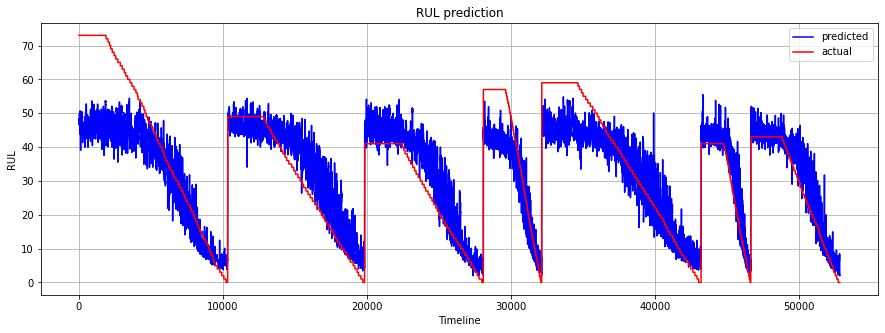

In [4]:
fig, ax = plot_rul_pred(outputs)

# Bayesian Model

In [5]:
from types import SimpleNamespace
from pathlib import Path

args = SimpleNamespace(
    data_path="../data/ncmapss/",
    out_path="../results/ncmapss/",
    model_name="dnn",
    net="linear",
    lr=1e-4
)

base_log_dir = Path(args.out_path, "bayesian", args.model_name)
checkpoint_file = get_checkpoint(base_log_dir, version=None)


data = NCMAPSSDataModule(args.data_path, batch_size=1000)
#dnn = NCMAPSSModel.load_from_checkpoint(checkpoint_file)

In [6]:
path = '../results/ncmapss/bayesian/'
model_name = 'dnn'

logger = PredLogger(path+model_name)
outputs = logger.load()

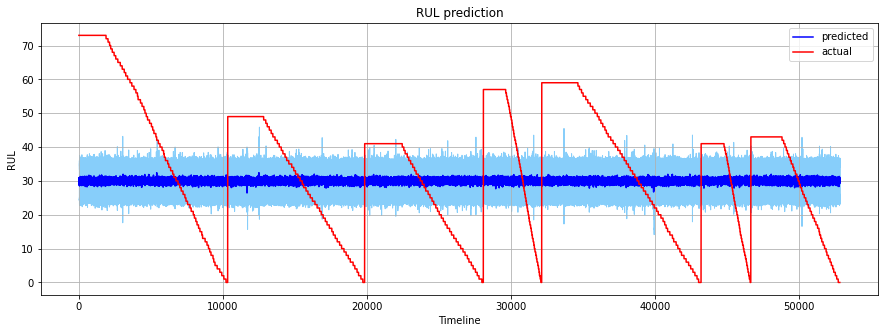

In [7]:
# I know, it doesn't work well yet !
fig, ax = plot_rul_pred(outputs, std=True)